In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from xgboost import to_graphviz
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
df = pd.read_csv("smarket.csv")

In [3]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [5]:
df.shape

(1250, 9)

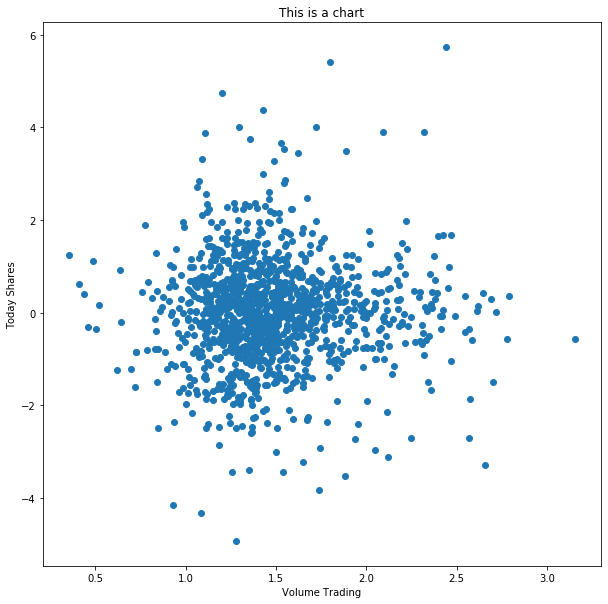

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_title("This is a chart")
ax.set_xlabel("Volume Trading")
ax.set_ylabel("Today Shares")
plt.scatter(x=df.Volume, y=df.Today)
plt.show()

In [7]:
labelencoder = LabelEncoder()

In [8]:
df['Dir'] = labelencoder.fit_transform(df.Direction)

In [9]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Dir
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up,1
...,...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up,1
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down,0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up,1
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
 9   Dir        1250 non-null   int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 92.9+ KB


In [11]:
df.drop('Direction',axis=1, inplace=True)

In [12]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Dir
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,1
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,1
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,0


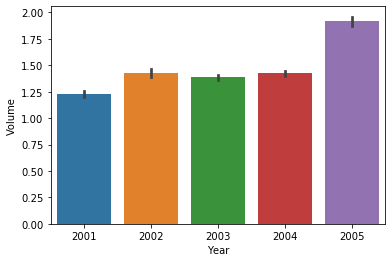

In [13]:
sns.barplot(x=df.Year, y=df.Volume, data=df)
plt.show()

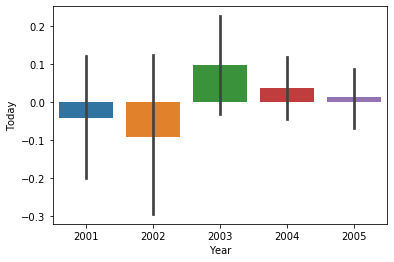

In [14]:
sns.barplot(x=df.Year, y=df.Today, data=df)
plt.show()

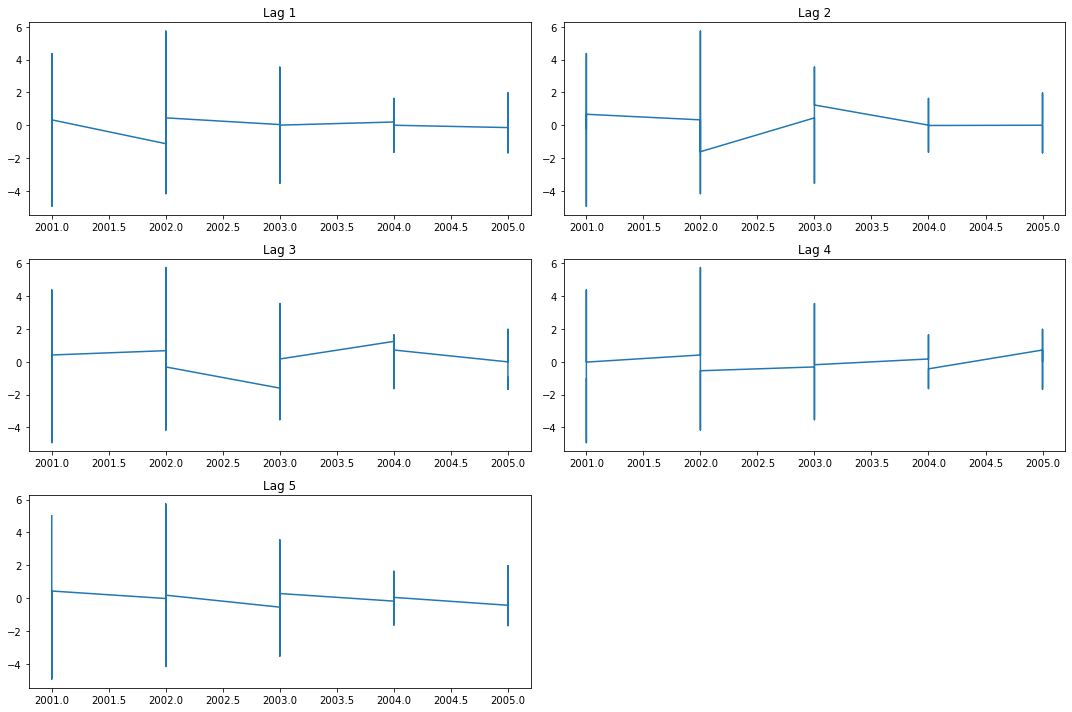

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.title("Lag 1")
plt.plot(df.Year,df.Lag1)
plt.subplot(3,2,2)
plt.title("Lag 2")
plt.plot(df.Year,df.Lag2)
plt.subplot(3,2,3)
plt.title("Lag 3")
plt.plot(df.Year,df.Lag3)
plt.subplot(3,2,4)
plt.title("Lag 4")
plt.plot(df.Year,df.Lag4)
plt.subplot(3,2,5)
plt.title("Lag 5")
plt.plot(df.Year,df.Lag5)
plt.tight_layout()
plt.show()


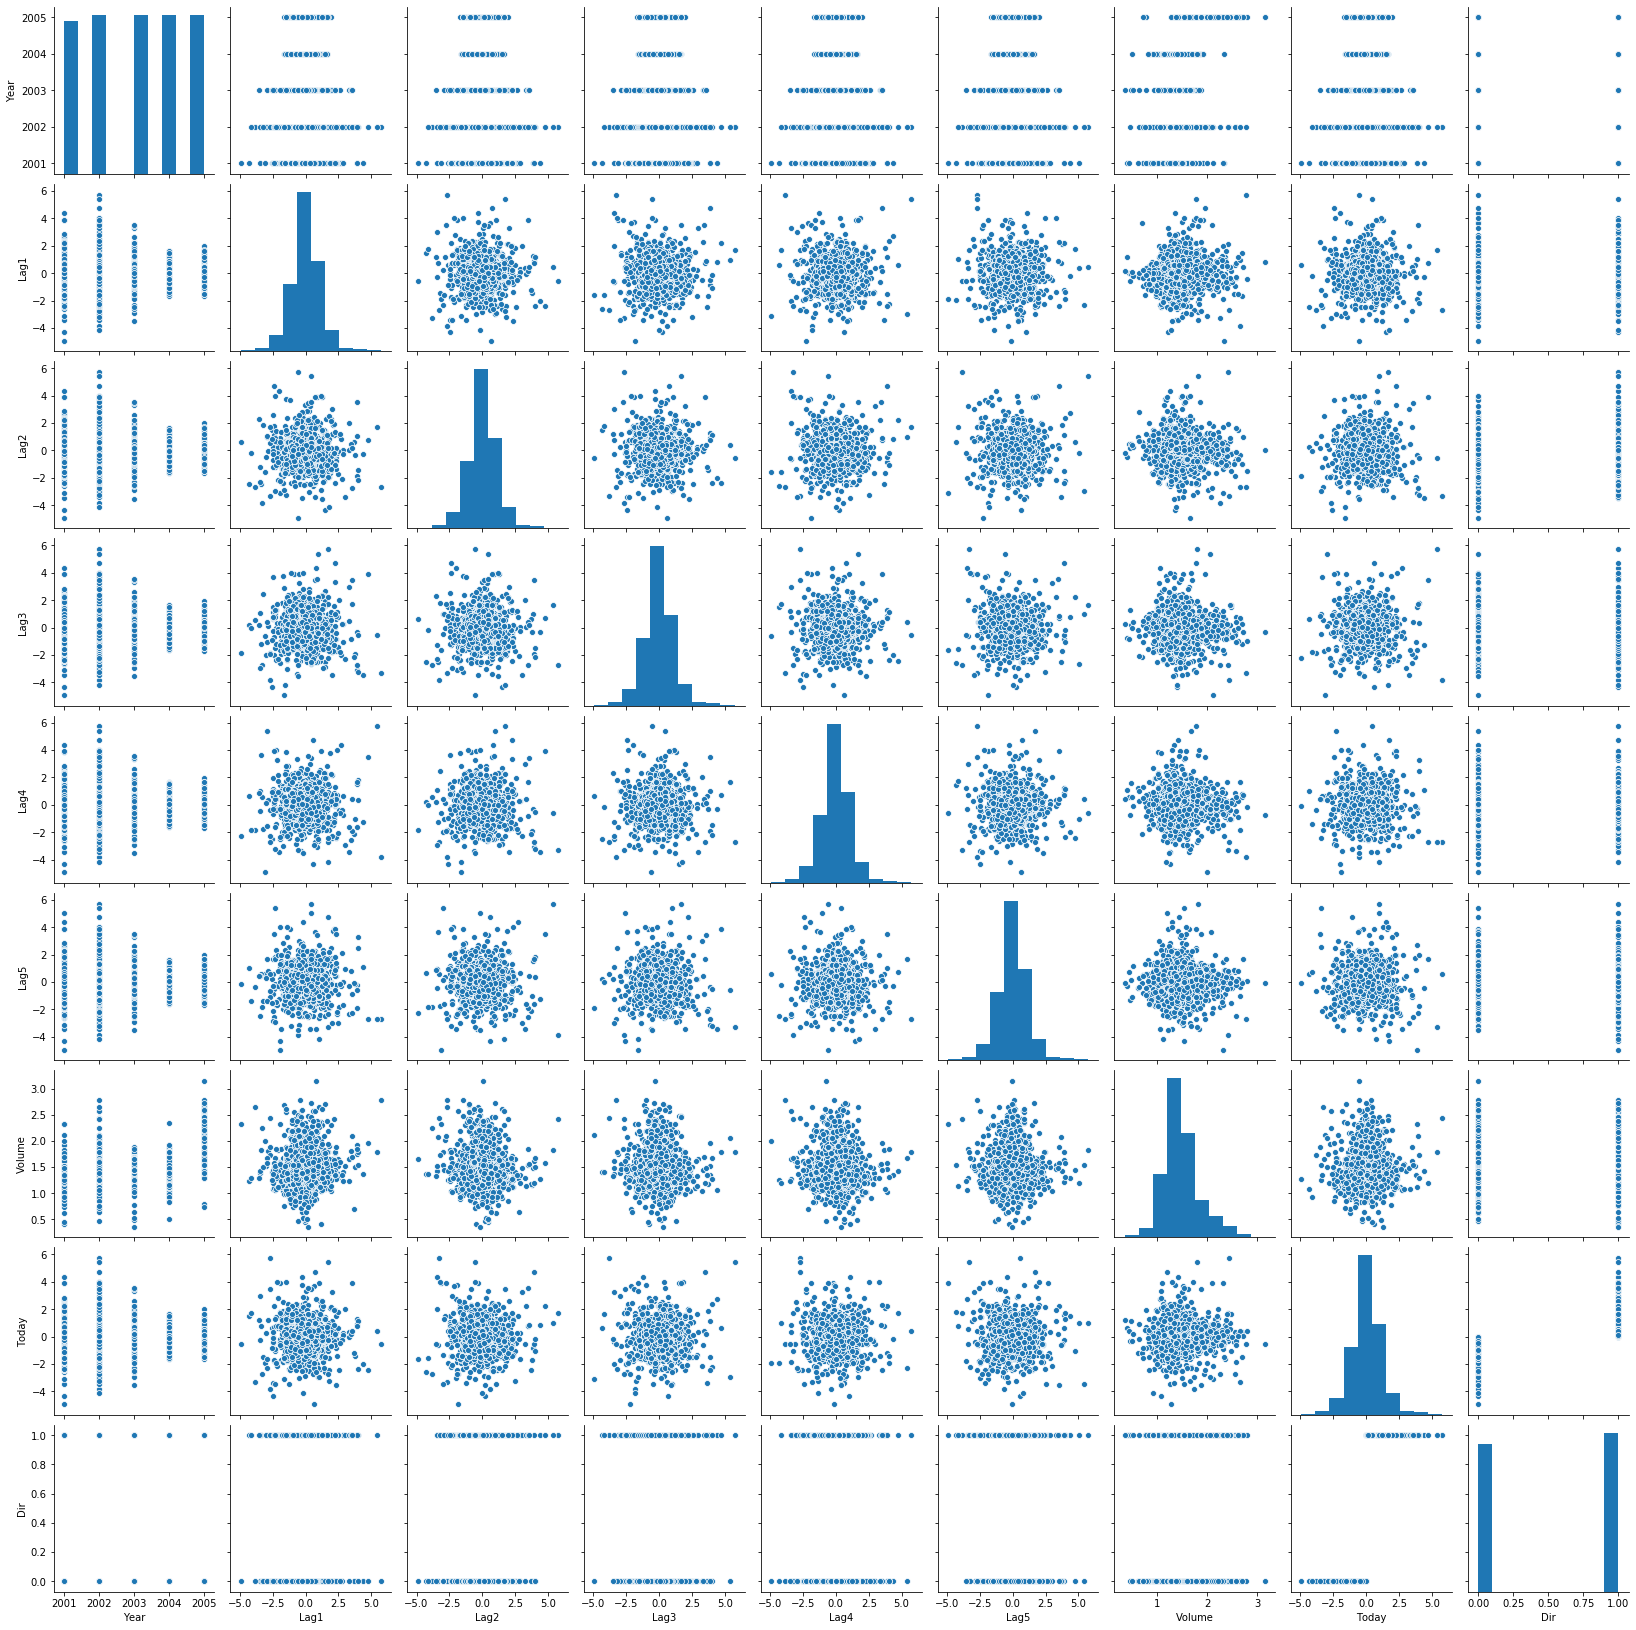

In [16]:
sns.pairplot(df)

In [17]:
df.drop('Year',axis=1, inplace=True)

In [18]:
df

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Dir
0,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
...,...,...,...,...,...,...,...,...
1245,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,1
1246,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,0
1247,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,1
1248,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,0


In [19]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [20]:
X.values, y.values

(array([[ 0.381  , -0.192  , -2.624  , ...,  5.01   ,  1.1913 ,  0.959  ],
        [ 0.959  ,  0.381  , -0.192  , ..., -1.055  ,  1.2965 ,  1.032  ],
        [ 1.032  ,  0.959  ,  0.381  , ..., -2.624  ,  1.4112 , -0.623  ],
        ...,
        [-0.955  ,  0.043  ,  0.422  , ..., -0.024  ,  1.54047,  0.13   ],
        [ 0.13   , -0.955  ,  0.043  , ...,  0.252  ,  1.42236, -0.298  ],
        [-0.298  ,  0.13   , -0.955  , ...,  0.422  ,  1.38254, -0.489  ]]),
 array([1, 1, 0, ..., 1, 0, 0]))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
xgbmodel = XGBClassifier(random_state=0)

In [23]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="error", early_stopping_rounds=10)

[0]	validation_0-error:0
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0
[2]	validation_0-error:0
[3]	validation_0-error:0
[4]	validation_0-error:0
[5]	validation_0-error:0
[6]	validation_0-error:0
[7]	validation_0-error:0
[8]	validation_0-error:0
[9]	validation_0-error:0
[10]	validation_0-error:0
Stopping. Best iteration:
[0]	validation_0-error:0



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
y_pred = xgbmodel.predict(X_test)

In [25]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0])

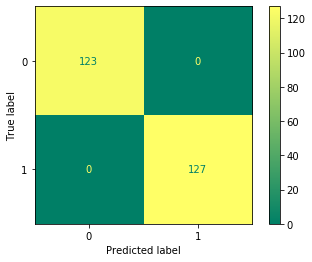

In [26]:
plot_confusion_matrix(xgbmodel,X_test, y_test,values_format='.4g', cmap="summer")

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       127

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



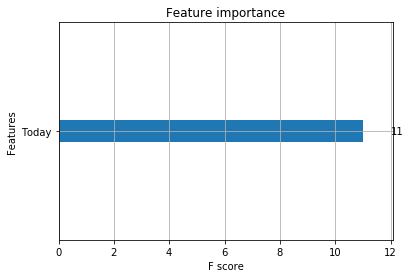

In [28]:
plot_importance(xgbmodel)